In [9]:
from joblib import load
from utils import TransactionDataset
import shap
import matplotlib.pyplot as plt

In [2]:

model = load("./models_exports/random_forest_classifier.joblib")

In [3]:
data = TransactionDataset().get_training_test_split()

In [4]:
x_train = model[0:1].fit_transform(data.TRAINING.predictors, data.TRAINING.outcome)

explainer = shap.TreeExplainer(model[-1]).shap_values(x_train)

In [5]:
feature_names = model[0:1].get_feature_names_out()
feature_names = [feat.split("__")[-1] for feat in feature_names]

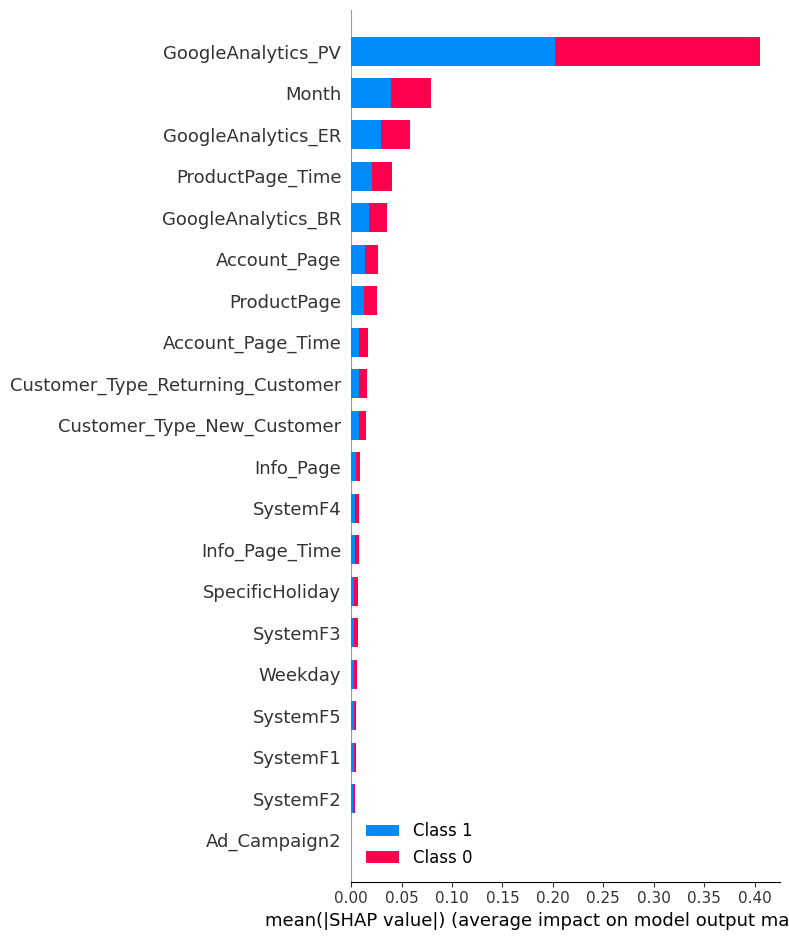

In [12]:
shap_summary = shap.summary_plot(explainer, x_train, feature_names=feature_names, show=False)
plt.savefig('./XAI/shapley_values.png')